In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [2]:
df = pd.read_csv("Churn.csv", sep=';')
df

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [3]:
df.columns = ["ID", "SCORE","ESTADO", "GENERO", "IDADE", "PATRIMONIO", "SALDO", "PRODUTOS", "TEAMCARTCREDIT", "ATIVO", "SALARIO", "SAIU"]
df.isna().sum()

ID                0
SCORE             0
ESTADO            0
GENERO            8
IDADE             0
PATRIMONIO        0
SALDO             0
PRODUTOS          0
TEAMCARTCREDIT    0
ATIVO             0
SALARIO           7
SAIU              0
dtype: int64

In [4]:
# Variaveis Categoricas
agrupado = df.groupby(['ESTADO']).size() # Crirar grupos de estaddos
agrupado #Lista o total por grupo

ESTADO
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='ESTADO'>

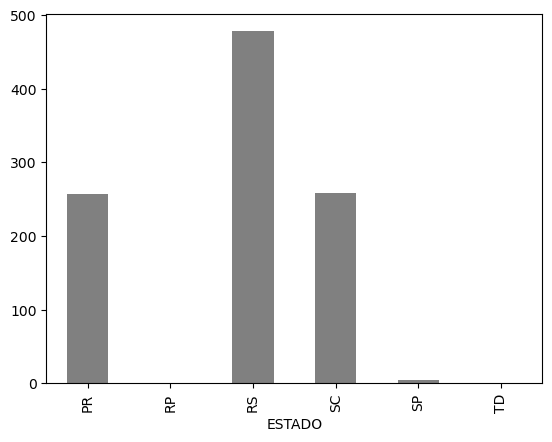

In [5]:
agrupado.plot.bar(color="gray")

In [6]:
# Variaveis Categoricas
agrupado = df.groupby(['GENERO']).size() # Lista o total por grupo
agrupado

GENERO
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='GENERO'>

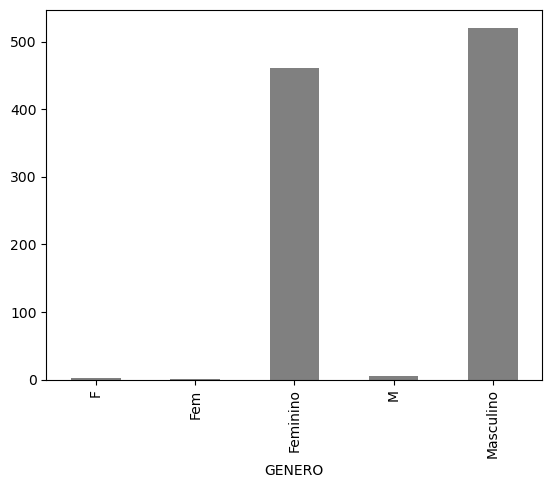

In [7]:
agrupado.plot.bar(color="gray")

In [8]:
# Variaveis Numerica
df['SCORE'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: SCORE, dtype: float64

Text(0.5, 1.0, 'SCORE')

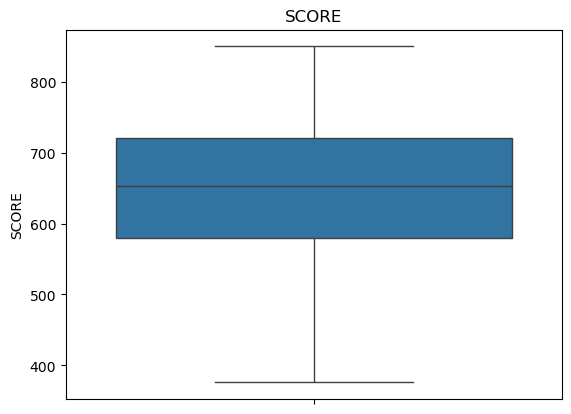

In [9]:
srn.boxplot(df['SCORE']).set_title('SCORE')

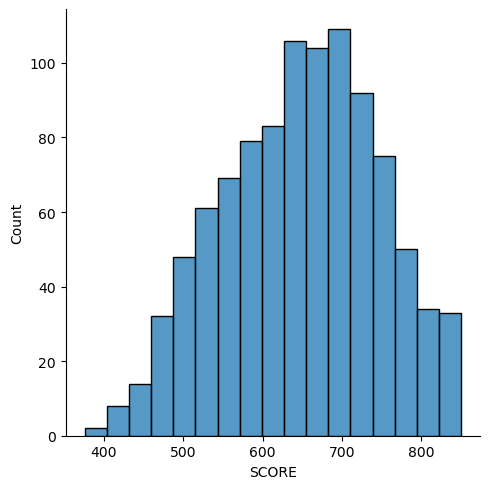

In [10]:
srn.displot(df['SCORE'])

In [11]:
# Variavel Numerica
df['IDADE'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: IDADE, dtype: float64

Text(0.5, 1.0, 'IDADE')

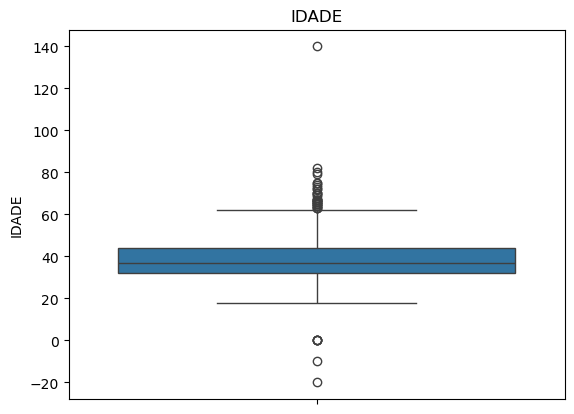

In [12]:
srn.boxplot(df['IDADE']).set_title('IDADE')

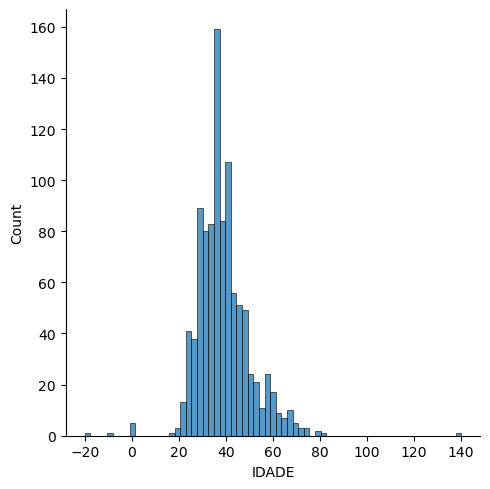

In [13]:
srn.displot(df['IDADE'])

In [14]:
# Variavel Numerica
df['SALDO'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: SALDO, dtype: float64

Text(0.5, 1.0, 'SALDO')

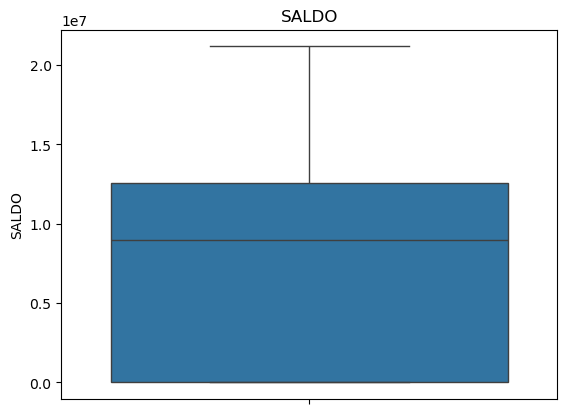

In [15]:
srn.boxplot(df['SALDO']).set_title('SALDO')

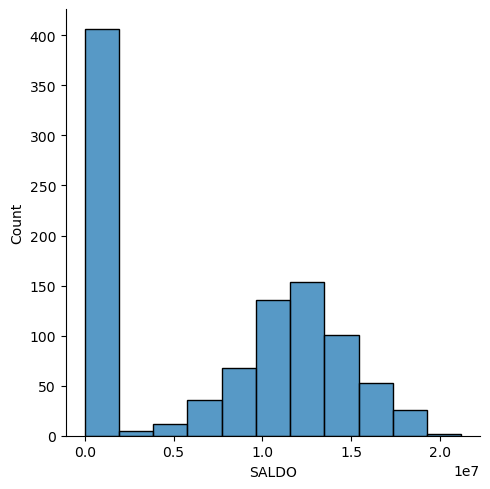

In [16]:
srn.displot(df['SALDO'])

In [17]:
# Variavel Numerica
df['SALARIO'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: SALARIO, dtype: float64

Text(0.5, 1.0, 'IDADE')

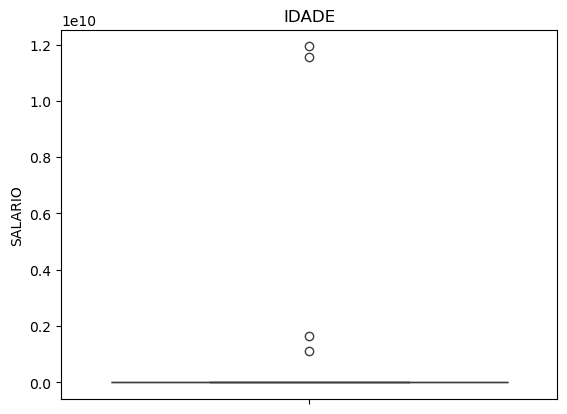

In [18]:
srn.boxplot(df['SALARIO']).set_title('IDADE')

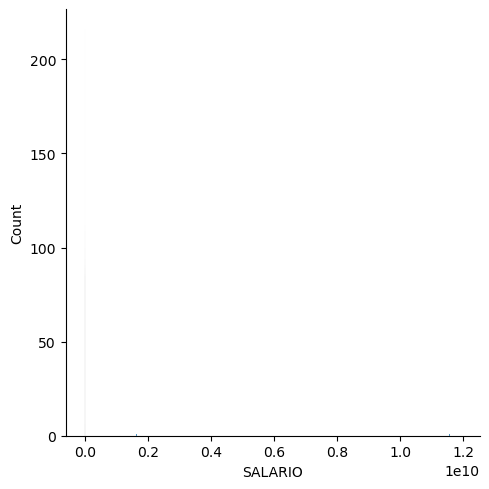

In [19]:
srn.displot(df['SALARIO'])

In [20]:
df.isnull().sum()

ID                0
SCORE             0
ESTADO            0
GENERO            8
IDADE             0
PATRIMONIO        0
SALDO             0
PRODUTOS          0
TEAMCARTCREDIT    0
ATIVO             0
SALARIO           7
SAIU              0
dtype: int64

In [21]:
## Resolvendo os dados Salario
mediana = sts.median(df['SALARIO'])
mediana

70518.0

In [22]:
df['SALARIO'] = df['SALARIO'].fillna(mediana)
df.isnull().sum()

ID                0
SCORE             0
ESTADO            0
GENERO            8
IDADE             0
PATRIMONIO        0
SALDO             0
PRODUTOS          0
TEAMCARTCREDIT    0
ATIVO             0
SALARIO           0
SAIU              0
dtype: int64

In [23]:
# Tratando a inconsistencia de dados dos gêneros
# 1 preencher o Masculino com a moda
df.fillna({'GENERO': 'Masculino'}, inplace=True)
df['GENERO'].isnull().sum()

0

In [24]:
#2 Padronizar de acordo com o domínio
df.loc[df['GENERO']=='M', 'GENERO'] = 'Masculino'

#Padronizando
df.loc[df['GENERO'].isin(['Fem', 'F']), 'GENERO'] = 'Feminino'
agrupado = df.groupby(['GENERO']).size()
agrupado


GENERO
Feminino     464
Masculino    535
dtype: int64

In [25]:
df['IDADE'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: IDADE, dtype: float64

In [26]:
#Padronizando a idade < 0 e > 120 (Dominio)
df['IDADE'] = pd.to_numeric(df['IDADE'], errors='coerce')
df.loc[(df['IDADE'] < 0) | (df['IDADE'] > 120), 'IDADE']

867    -10
984    -20
990    140
Name: IDADE, dtype: int64

In [27]:
#Trocando idades outliers por mediana
#Mediana pq esta menos sujeito a outliers, diferente da media
mediana = sts.median(df['IDADE'])
mediana

37

In [28]:
df.loc[(df['IDADE'] < 0) | (df['IDADE'] > 120), 'IDADE'] = mediana
df['IDADE'].describe()

count    999.000000
mean      38.903904
std       10.672421
min        0.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       82.000000
Name: IDADE, dtype: float64

In [29]:
#Buscando duplicados
df[df.duplicated(['ID'], keep=False)]

,ID,SCORE,ESTADO,GENERO,IDADE,PATRIMONIO,SALDO,PRODUTOS,TEAMCARTCREDIT,ATIVO,SALARIO,SAIU
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [30]:
# Tratando dados duplicados
#Removendo duplicados
df.drop_duplicates(subset="ID", keep='first', inplace=True)

#Buscando duplicados
df[df.duplicated(['ID'], keep=False)]

,ID,SCORE,ESTADO,GENERO,IDADE,PATRIMONIO,SALDO,PRODUTOS,TEAMCARTCREDIT,ATIVO,SALARIO,SAIU


In [31]:
# Tratando os estados errados e fora do dominio
# Substituir pela moda(valor mais comum)
agrupado = df.groupby(['ESTADO']).size()
agrupado

ESTADO
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [32]:
df.loc[df['ESTADO'].isin(['TD', 'SP', 'RP']), 'ESTADO'] = 'RS'

agrupado = df.groupby(['ESTADO']).size()
agrupado

ESTADO
PR    257
RS    483
SC    258
dtype: int64

In [66]:
# Tratando Outliers em salarios
# Criando desvio padrão
desv = sts.stdev(df['SALARIO'])
desv

528988918.4679201

In [70]:
df.loc[df['SALARIO'] >= 2 * desv]

,ID,SCORE,ESTADO,GENERO,IDADE,PATRIMONIO,SALDO,PRODUTOS,TEAMCARTCREDIT,ATIVO,SALARIO,SAIU
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [72]:
mediana = sts.median(df['SALARIO'])
mediana

8637195.5

In [74]:
df.loc[df['SALARIO'] >= 2 * desv, 'SALARIO'] = mediana
df.loc[df['SALARIO'] >= 2 * desv]

,ID,SCORE,ESTADO,GENERO,IDADE,PATRIMONIO,SALDO,PRODUTOS,TEAMCARTCREDIT,ATIVO,SALARIO,SAIU


In [76]:
df.head()

,ID,SCORE,ESTADO,GENERO,IDADE,PATRIMONIO,SALDO,PRODUTOS,TEAMCARTCREDIT,ATIVO,SALARIO,SAIU
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [78]:
df.shape

(998, 12)